In [1]:
pip install statsmodels==0.12.2

     |████████████████████████████████| 9.5 MB 10.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## Reading Dataset 

In [4]:
url='https://raw.githubusercontent.com/nzxtdata/Multivariate-Financial-Time-Series-Forecasting-with-Machine-Learning/main/SPXfundamental.csv'
df1 = pd.read_csv(url, parse_dates= True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

macro_data=df1.copy()
macro_data=macro_data.asfreq('b')
macro_data=macro_data.fillna(method='ffill')
macro_data['returns'] = macro_data.spxclose.pct_change(1).mul(100)
macro_data = macro_data.iloc[1:]
macro_data=macro_data[macro_data.index < '2020-12-01']

In [5]:
macro_data.head()

,spxopen,spxhigh,spxlow,spxclose,spxvolume,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%,returns
Date,,,,,,,,,,,
2003-04-01,848.179993,861.280029,847.849976,858.479980,1.461600e+09,1.16,27.22,1.770926,5.866667,3.92,1.214363
2003-04-02,858.479980,884.570007,858.479980,880.900024,1.589800e+09,1.16,27.22,1.770926,5.866667,3.92,2.611598
2003-04-03,880.900024,885.890015,876.119995,876.450012,1.339500e+09,1.16,27.22,1.770926,5.866667,3.92,-0.505167
2003-04-04,876.450012,882.729980,874.229980,878.849976,1.241200e+09,1.16,27.22,1.770926,5.866667,3.92,0.273828
2003-04-07,878.849976,904.890015,878.849976,879.929993,1.494000e+09,1.16,27.22,1.770926,5.866667,3.92,0.122890


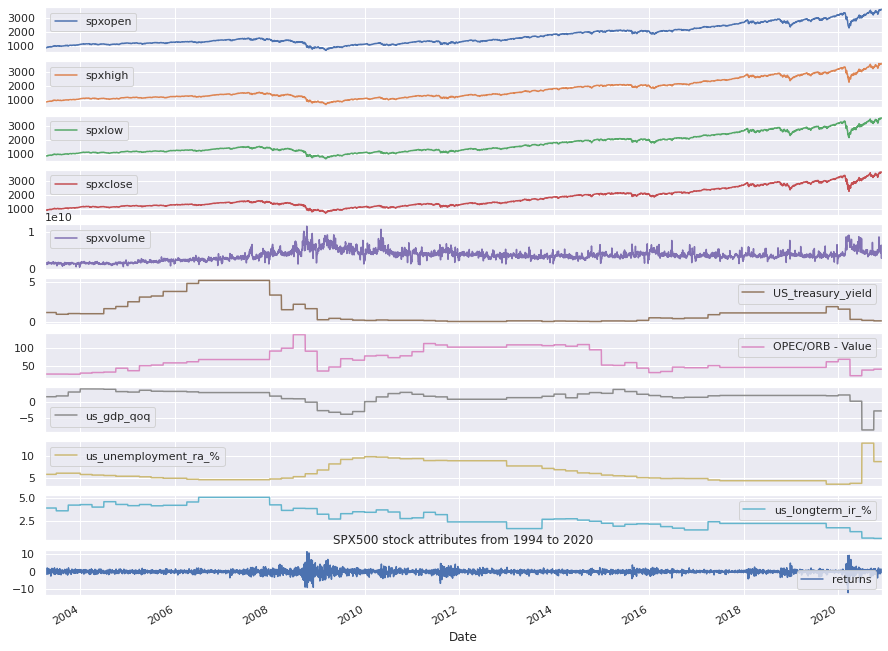

In [6]:
macro_data['1994':'2020'].plot(subplots=True, figsize=(15,12))
plt.title('SPX500 stock attributes from 1994 to 2020')
plt.savefig('stocks.png')
plt.show()

In [7]:
macro_data.columns

Index(['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume',
       'US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns'],
      dtype='object')

[10:29:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


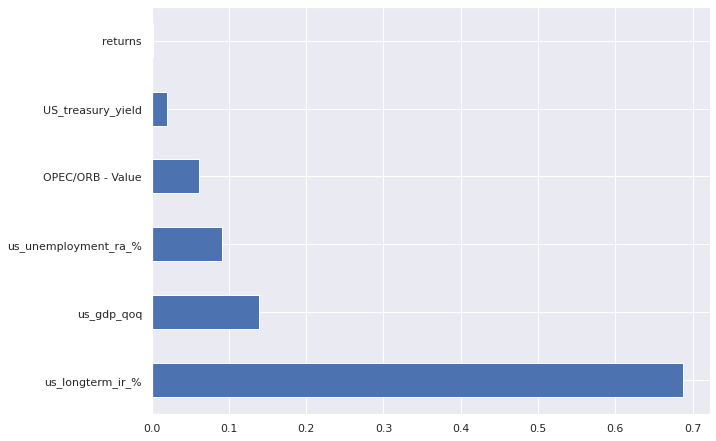

In [8]:
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

model = XGBRegressor()
model.fit(macro_data[['US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns']], macro_data[['spxclose']])

(pd.Series(model.feature_importances_, index=macro_data[['US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns']].columns)
   .nlargest(7)
   .plot(kind='barh'))

In [9]:
macro_data.isnull().sum()

spxopen                 0
spxhigh                 0
spxlow                  0
spxclose                0
spxvolume               0
US_treasury_yield       0
OPEC/ORB - Value        0
us_gdp_qoq              0
us_unemployment_ra_%    0
us_longterm_ir_%        0
returns                 0
dtype: int64

In [10]:
macro_data.describe()

,spxopen,spxhigh,spxlow,spxclose,spxvolume,US_treasury_yield,OPEC/ORB - Value,us_gdp_qoq,us_unemployment_ra_%,us_longterm_ir_%,returns
count,4610.000000,4610.000000,4610.000000,4610.000000,4.610000e+03,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000
mean,1729.844069,1739.308738,1719.731838,1730.189541,3.503870e+09,1.281564,65.411351,1.787450,6.266298,3.022704,0.038587
std,681.413161,683.788752,678.458298,681.293007,1.384218e+09,1.571004,27.626532,2.128167,2.037378,1.116241,1.189548
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08,0.040000,22.610000,-9.032775,3.600000,0.650000,-11.984055
25%,1198.079956,1204.775024,1191.045013,1198.364990,2.690082e+09,0.130000,45.630000,1.425725,4.633333,2.263333,-0.373139
50%,1433.460022,1440.820007,1427.315002,1433.344971,3.469470e+09,0.500000,58.790000,2.183861,5.433333,2.736667,0.046985
75%,2122.220032,2128.804932,2112.845093,2124.019958,4.144278e+09,1.640000,90.700000,3.119473,7.800000,4.020000,0.526886
max,3638.550049,3645.989990,3629.330078,3638.350098,1.145623e+10,5.170000,136.030000,4.326363,13.066667,5.070000,11.580037


In [12]:
print('spxclose causes US_treasury_yield\n')
granger_1 = grangercausalitytests(macro_data[['spxclose', 'US_treasury_yield']].diff()[1:], [5])
print('------------------')

print('US_treasury_yield causes spxclose\n')
granger_1 = grangercausalitytests(macro_data[[ 'US_treasury_yield','spxclose']].diff()[1:], [5])
print('------------------')

print('spxclose causes us_unemployment_ra_%\n')
granger_2 = grangercausalitytests(macro_data[['spxclose', 'us_unemployment_ra_%']].diff()[1:], [5])
print('------------------')

print('us_unemployment_ra_% causes spxclose \n')
granger_2 = grangercausalitytests(macro_data[['us_unemployment_ra_%','spxclose']].diff()[1:], [5])
print('------------------')

print('spxclose causes OPEC/ORB - Value\n')
granger_2 = grangercausalitytests(macro_data[['spxclose', 'OPEC/ORB - Value']].diff()[1:], [5])
print('------------------')

print(' OPEC/ORB - Value  causes spxclose\n')
granger_2 = grangercausalitytests(macro_data[[ 'OPEC/ORB - Value','spxclose']].diff()[1:], [5])
print('------------------')

print('spxclose causes us_gdp_qoq	\n')
granger_2 = grangercausalitytests(macro_data[['spxclose', 'us_gdp_qoq']].diff()[1:], [5])
print('------------------')

print('us_gdp_qoq causes spxclose	\n')
granger_2 = grangercausalitytests(macro_data[['us_gdp_qoq','spxclose']].diff()[1:], [5])
print('------------------')

print('spxvolume causes spxclose	\n')
granger_2 = grangercausalitytests(macro_data[['spxvolume','spxclose']].diff()[1:], [5])
print('------------------')

print('returns causes spxclose	\n')
granger_2 = grangercausalitytests(macro_data[['returns','spxclose']].diff()[1:], [5])
print('------------------')

print('us_longterm_ir_% causes spxclose	\n')
granger_2 = grangercausalitytests(macro_data[['us_longterm_ir_%','spxclose']].diff()[1:], [5])
print('------------------')

print('spxlow causes spxclose	\n')
granger_2 = grangercausalitytests(macro_data[['spxlow','spxclose']].diff()[1:], [5])
print('------------------')

print('spxhigh causes spxclose	\n')
granger_2 = grangercausalitytests(macro_data[['spxhigh','spxclose']].diff()[1:], [5])
print('------------------')

print('spxopen causes spxclose	\n')
granger_2 = grangercausalitytests(macro_data[['spxopen','spxclose']].diff()[1:], [5])
print('------------------')

spxclose causes US_treasury_yield


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.8976  , p=0.4816  , df_denom=4593, df_num=5
ssr based chi2 test:   chi2=4.4990  , p=0.4800  , df=5
likelihood ratio test: chi2=4.4968  , p=0.4803  , df=5
parameter F test:         F=0.8976  , p=0.4816  , df_denom=4593, df_num=5
------------------
US_treasury_yield causes spxclose


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.2869  , p=0.0001  , df_denom=4593, df_num=5
ssr based chi2 test:   chi2=26.4977 , p=0.0001  , df=5
likelihood ratio test: chi2=26.4218 , p=0.0001  , df=5
parameter F test:         F=5.2869  , p=0.0001  , df_denom=4593, df_num=5
------------------
spxclose causes us_unemployment_ra_%


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.0392  , p=0.0096  , df_denom=4593, df_num=5
ssr based chi2 test:   chi2=15.2325 , p=0.0094  , df=5
likelihood ratio test: chi2=15.2073 , p=0.0095  , df=5
parameter F test

# VARMA

In [13]:
def optimize_VARMA(endog, parameters_list):
    """
        Returns a dataframe with parameters (p,d) and corresponding MSE
        
        endog - the observed variable
        parameters_list - list of (p,q) tuples
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try:
            model = VARMAX(endog, order=param).fit(disp=False)
        except:
            continue
    
        mse = model.mse
        results.append([param, mse])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'mse']
    
    result_df = result_df.sort_values(by='mse', ascending=True).reset_index(drop=True)
    
    return result_df

In [14]:
macro_data.columns

Index(['spxopen', 'spxhigh', 'spxlow', 'spxclose', 'spxvolume',
       'US_treasury_yield', 'OPEC/ORB - Value', 'us_gdp_qoq',
       'us_unemployment_ra_%', 'us_longterm_ir_%', 'returns'],
      dtype='object')

In [15]:
endog = macro_data[['spxclose','US_treasury_yield','returns','OPEC/ORB - Value','spxopen','us_gdp_qoq','us_unemployment_ra_%']]

In [16]:
endog = macro_data[['spxclose','US_treasury_yield','returns','OPEC/ORB - Value','spxopen','us_gdp_qoq','us_unemployment_ra_%']]

p = range(0, 5, 1)
q = range(0, 4, 1)

parameters = product(p, q)
parameters_list = list(parameters)

result_df_VARMA = optimize_VARMA(endog, parameters_list)
result_df_VARMA

,"(p,q)",mse
0,"(2, 2)",38178.411197
1,"(0, 2)",40627.158106
2,"(1, 3)",57714.529714
3,"(1, 1)",60354.970536
4,"(1, 2)",60851.441067
5,"(0, 1)",63415.286711
6,"(0, 3)",75711.814948
7,"(3, 0)",87712.103114
8,"(2, 3)",95301.850459
9,"(1, 0)",97805.618469


In [17]:
best_model_VARMA = VARMAX(endog, order=(2,2))
res_VARMA = best_model_VARMA.fit(disp=False)
print(res_VARMA.summary())

                                                                           Statespace Model Results                                                                          
Dep. Variable:     ['spxclose', 'US_treasury_yield', 'returns', 'OPEC/ORB - Value', 'spxopen', 'us_gdp_qoq', 'us_unemployment_ra_%']   No. Observations:                 4610
Model:                                                                                                                    VARMA(2,2)   Log Likelihood             -407188.893
                                                                                                                         + intercept   AIC                         814839.787
Date:                                                                                                               Tue, 27 Jul 2021   BIC                         816326.499
Time:                                                                                                                       15:42:

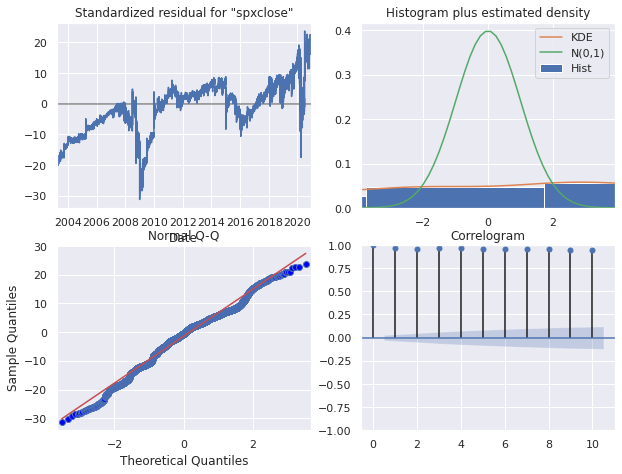

In [18]:
res_VARMA.plot_diagnostics();

In [19]:
n_forecast = 30
predict = res_VARMA.get_prediction(end=best_model_VARMA.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

In [20]:
macro_date_show = macro_data[macro_data.index >= '2020-11-01']
true_vals = df1[(df1.index >= '2020-12-01') & (df1.index < '2021-01-01')]

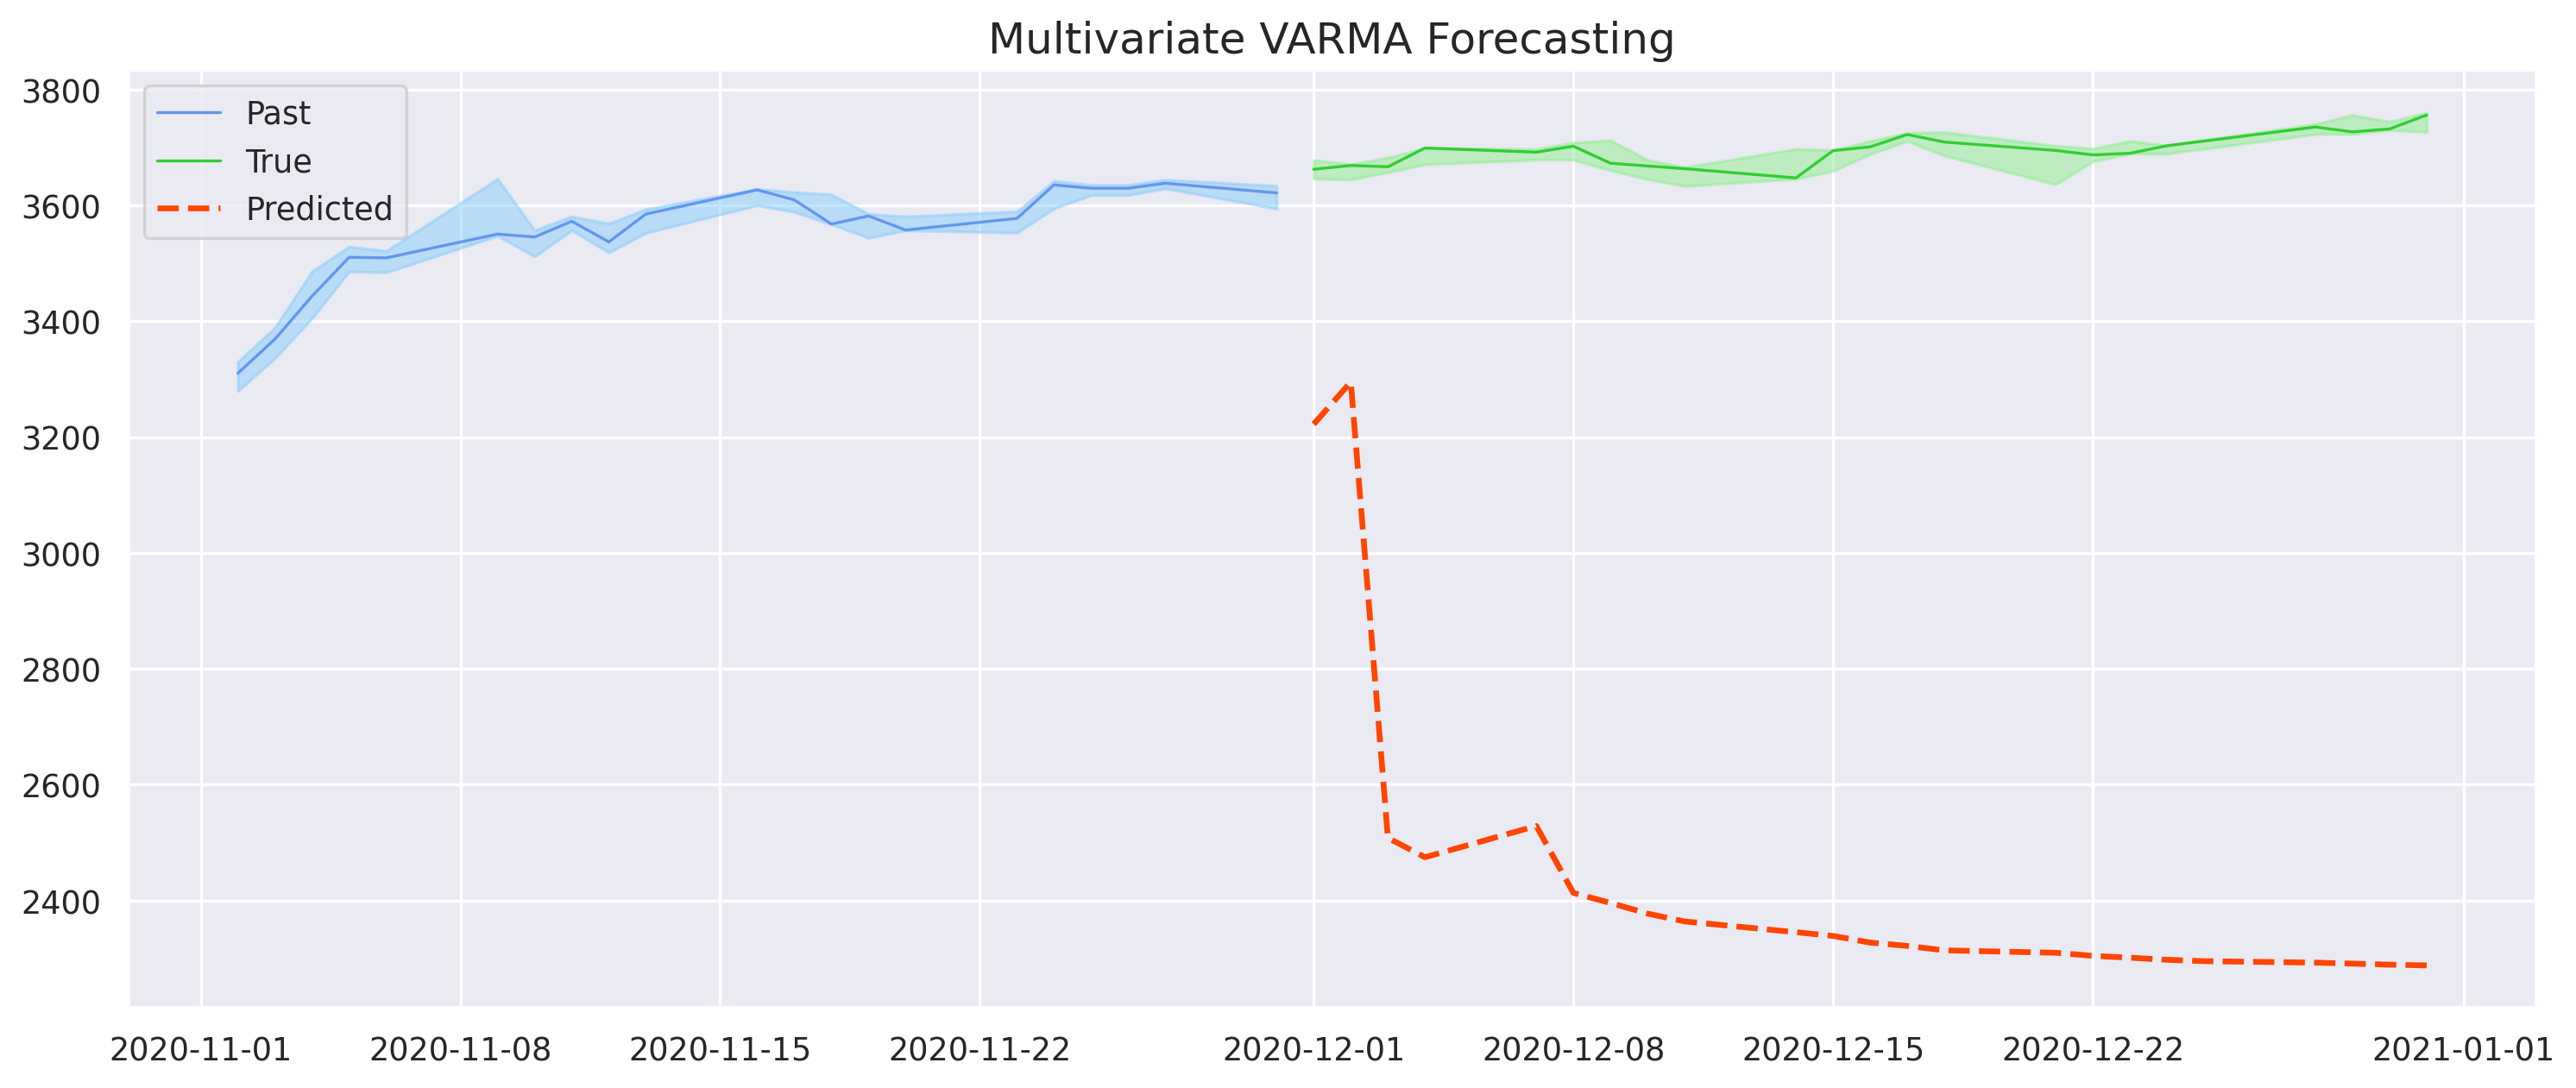

In [21]:
fig, ax1 = plt.subplots(dpi=240,figsize=(15,6))

ax1.plot(macro_date_show['spxclose'], color='cornflowerblue', linewidth=1, label='Past')
ax1.plot(true_vals['spxclose'], color='limegreen', linewidth=1, label='True')


ax1.plot(predict.predicted_mean.index[-31:-8], 
         predict.predicted_mean['spxclose'][-31:-8], 
         color='orangered', 
         ls='--',
         linewidth=2, label='Predicted')

ax1.fill_between(macro_date_show.index, macro_date_show.spxlow, macro_date_show.spxhigh, color='lightskyblue', alpha=0.5)
ax1.fill_between(true_vals.index, true_vals.spxlow, true_vals.spxhigh, color='lightgreen', alpha=0.5)

ax1.set_title("Multivariate VARMA Forecasting", size = 15)
ax1.legend()

plt.show()

In [22]:
test_df = true_vals.resample('D').mean()[['spxclose']]
test_df['preds'] = predict.predicted_mean[['spxclose']][-31:-8].resample('D').mean().values

test_df = test_df.dropna()

In [23]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [24]:
timeseries_evaluation_metrics_func(test_df.spxclose, test_df.preds)

Evaluation metric results:-
MSE is : 1664711.4624777657
MAE is : 1258.9652138285785
RMSE is : 1290.2369791932665
MAPE is : 34.04212541872446
R2 is : -2289.87603557802

